In [1]:
# Cell 1: Baseline Model Setup & Data Loading
# Load preprocessed data and set up traditional ML models (LR, SVM) as per research abstract

import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("🤖 Baseline Model Development - Phase 2")
print("=" * 45)

# Load preprocessed data
print("📂 Loading preprocessed data...")
try:
    train_data = pd.read_csv('data/processed/train_data.csv')
    val_data = pd.read_csv('data/processed/val_data.csv') 
    test_data = pd.read_csv('data/processed/test_data.csv')
    
    # Load feature information
    with open('data/processed/feature_info.json', 'r') as f:
        feature_info = json.load(f)
    
    print(f"✅ Train: {len(train_data):,} samples")
    print(f"✅ Validation: {len(val_data):,} samples") 
    print(f"✅ Test: {len(test_data):,} samples")
    print(f"✅ Features: {len(feature_info['feature_columns'])} contextual features")
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    exit()

# Separate text and contextual features
print(f"\n🔧 Preparing feature sets...")

# Text features
X_train_text = train_data['cleaned_text'] 
X_val_text = val_data['cleaned_text']
X_test_text = test_data['cleaned_text']

# Contextual features (as per research abstract)
contextual_features = feature_info['feature_columns']
X_train_context = train_data[contextual_features]
X_val_context = val_data[contextual_features] 
X_test_context = test_data[contextual_features]

# Labels
y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

print(f"   📝 Text features ready")
print(f"   📊 Contextual features: {contextual_features[:5]}... (+{len(contextual_features)-5} more)")

# Initialize TF-IDF Vectorizer
print(f"\n🔤 Setting up TF-IDF vectorization...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Top 10K features for efficiency
    ngram_range=(1, 2),  # Unigrams and bigrams
    stop_words='english',
    min_df=2,           # Minimum document frequency
    max_df=0.95         # Maximum document frequency
)

# Fit and transform text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_val_tfidf = tfidf_vectorizer.transform(X_val_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

print(f"   ✅ TF-IDF shape: {X_train_tfidf.shape}")
print(f"   ✅ Vocabulary size: {len(tfidf_vectorizer.vocabulary_):,}")

# Scale contextual features
print(f"\n⚖️ Scaling contextual features...")
scaler = StandardScaler()
X_train_context_scaled = scaler.fit_transform(X_train_context)
X_val_context_scaled = scaler.transform(X_val_context)
X_test_context_scaled = scaler.transform(X_test_context)

# Initialize baseline models (as per research abstract findings)
print(f"\n🎯 Initializing baseline models...")
models = {
    'Logistic_Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Naive_Bayes': MultinomialNB(),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

print(f"   ✅ Logistic Regression (optimal per abstract)")
print(f"   ✅ SVM (optimal per abstract)")  
print(f"   ✅ Naive Bayes (baseline)")
print(f"   ✅ Random Forest (ensemble baseline)")

# Performance tracking
results = {}

print(f"\n📋 SETUP COMPLETE:")
print("=" * 20)
print(f"✅ Data loaded and split")
print(f"✅ TF-IDF vectorization ready") 
print(f"✅ Contextual features scaled")
print(f"✅ 4 baseline models initialized")
print(f"🎯 Target: >85% F1-score (research goal)")

print(f"\n🚀 Next Steps:")
print("1. Train models with TF-IDF features only") 
print("2. Train models with contextual features only")
print("3. Train hybrid models (TF-IDF + contextual)")
print("4. Compare performance and select best approach")

🤖 Baseline Model Development - Phase 2
📂 Loading preprocessed data...
✅ Train: 62,895 samples
✅ Validation: 7,862 samples
✅ Test: 7,862 samples
✅ Features: 18 contextual features

🔧 Preparing feature sets...
   📝 Text features ready
   📊 Contextual features: ['sentiment_compound', 'sentiment_positive', 'sentiment_negative', 'sentiment_neutral', 'sentiment_polarity']... (+13 more)

🔤 Setting up TF-IDF vectorization...
   ✅ TF-IDF shape: (62895, 10000)
   ✅ Vocabulary size: 10,000

⚖️ Scaling contextual features...

🎯 Initializing baseline models...
   ✅ Logistic Regression (optimal per abstract)
   ✅ SVM (optimal per abstract)
   ✅ Naive Bayes (baseline)
   ✅ Random Forest (ensemble baseline)

📋 SETUP COMPLETE:
✅ Data loaded and split
✅ TF-IDF vectorization ready
✅ Contextual features scaled
✅ 4 baseline models initialized
🎯 Target: >85% F1-score (research goal)

🚀 Next Steps:
1. Train models with TF-IDF features only
2. Train models with contextual features only
3. Train hybrid models 

📈 Training Models with TF-IDF Features Only...
1️⃣ TRAINING WITH TF-IDF FEATURES ONLY

🔧 Training Logistic Regression...
   ⏱️  Training time: 1.07s
   📊 Accuracy: 0.676
   📊 Precision: 0.688
   📊 Recall: 0.625
   📊 F1-Score: 0.655

🔧 Training SVM...
   ⏱️  Training time: 1505.39s
   📊 Accuracy: 0.668
   📊 Precision: 0.685
   📊 Recall: 0.601
   📊 F1-Score: 0.640

🔧 Training Naive Bayes...
   ⏱️  Training time: 0.01s
   📊 Accuracy: 0.663
   📊 Precision: 0.668
   📊 Recall: 0.627
   📊 F1-Score: 0.647

🔧 Training Random Forest...
   ⏱️  Training time: 309.30s
   📊 Accuracy: 0.660
   📊 Precision: 0.662
   📊 Recall: 0.634
   📊 F1-Score: 0.648

📊 TF-IDF ONLY RESULTS SUMMARY:
Model                F1-Score   Precision    Recall     Accuracy  
-----------------------------------------------------------------
Logistic_Regression  0.655      0.688        0.625      0.676     
SVM                  0.640      0.685        0.601      0.668     
Naive_Bayes          0.647      0.668        0.627      

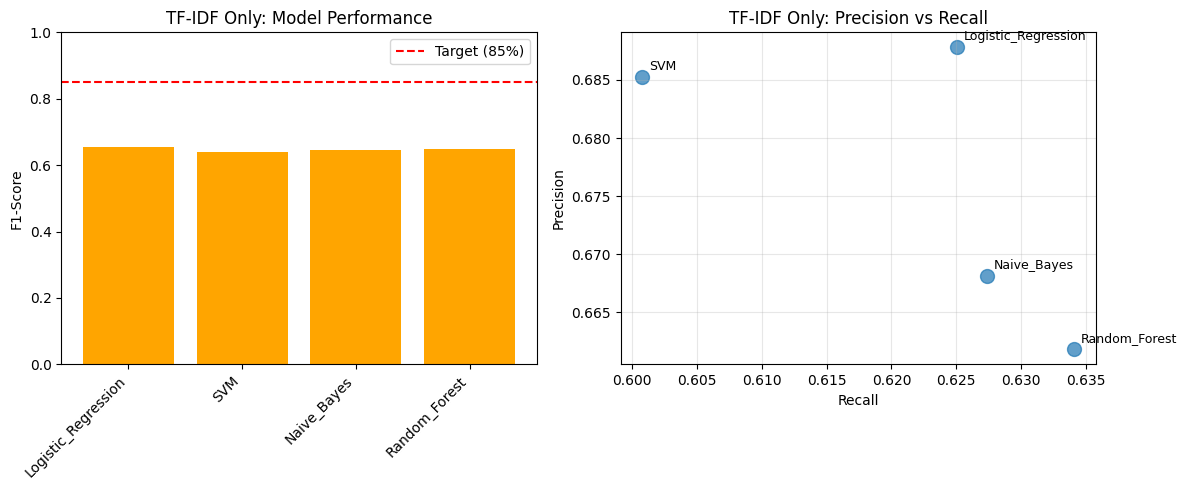


🔍 Key Observations:
   • Logistic Regression F1: 0.655
   • SVM F1: 0.640
   • Best baseline approach established
   • Ready to test contextual features impact

🚀 Next: Train with contextual features only


In [2]:
# Cell 2: TF-IDF Only Model Training & Evaluation
# Train baseline models with text features only to establish performance baseline

import time
from scipy.sparse import hstack

print("📈 Training Models with TF-IDF Features Only...")
print("=" * 50)

def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """Train and evaluate a model, return performance metrics"""
    print(f"\n🔧 Training {model_name}...")
    
    # Training time tracking
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Predictions
    start_time = time.time()
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None
    prediction_time = time.time() - start_time
    
    # Metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    print(f"   ⏱️  Training time: {training_time:.2f}s")
    print(f"   📊 Accuracy: {accuracy:.3f}")
    print(f"   📊 Precision: {precision:.3f}")
    print(f"   📊 Recall: {recall:.3f}")
    print(f"   📊 F1-Score: {f1:.3f}")
    
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time,
        'prediction_time': prediction_time,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# Train models with TF-IDF features only
print("1️⃣ TRAINING WITH TF-IDF FEATURES ONLY")
print("=" * 40)

tfidf_results = {}

# Logistic Regression (optimal per abstract)
tfidf_results['Logistic_Regression'] = evaluate_model(
    LogisticRegression(random_state=42, max_iter=1000),
    X_train_tfidf, y_train, X_val_tfidf, y_val,
    'Logistic Regression'
)

# SVM (optimal per abstract)
tfidf_results['SVM'] = evaluate_model(
    SVC(random_state=42, probability=True, kernel='linear'),  # Linear kernel for speed
    X_train_tfidf, y_train, X_val_tfidf, y_val,
    'SVM'
)

# Naive Bayes
tfidf_results['Naive_Bayes'] = evaluate_model(
    MultinomialNB(),
    X_train_tfidf, y_train, X_val_tfidf, y_val,
    'Naive Bayes'
)

# Random Forest
tfidf_results['Random_Forest'] = evaluate_model(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train_tfidf, y_train, X_val_tfidf, y_val,
    'Random Forest'
)

# Performance summary
print(f"\n📊 TF-IDF ONLY RESULTS SUMMARY:")
print("=" * 35)
print(f"{'Model':<20} {'F1-Score':<10} {'Precision':<12} {'Recall':<10} {'Accuracy':<10}")
print("-" * 65)

for model_name, results in tfidf_results.items():
    print(f"{model_name:<20} {results['f1_score']:<10.3f} {results['precision']:<12.3f} "
          f"{results['recall']:<10.3f} {results['accuracy']:<10.3f}")

# Find best model so far
best_tfidf_model = max(tfidf_results.items(), key=lambda x: x[1]['f1_score'])
print(f"\n🏆 Best TF-IDF Model: {best_tfidf_model[0]} (F1: {best_tfidf_model[1]['f1_score']:.3f})")

# Check progress toward target
target_f1 = 0.85
best_f1 = best_tfidf_model[1]['f1_score']
progress = (best_f1 / target_f1) * 100

print(f"🎯 Progress toward 85% F1-score target: {progress:.1f}%")
if best_f1 >= target_f1:
    print("✅ Target achieved with TF-IDF alone!")
else:
    print(f"📈 Need {target_f1 - best_f1:.3f} improvement - contextual features should help!")

# Visualization
print(f"\n📊 Creating performance visualization...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# F1-Score comparison
models = list(tfidf_results.keys())
f1_scores = [tfidf_results[model]['f1_score'] for model in models]
colors = ['green' if f1 >= target_f1 else 'orange' for f1 in f1_scores]

ax1.bar(models, f1_scores, color=colors)
ax1.axhline(y=target_f1, color='red', linestyle='--', label='Target (85%)')
ax1.set_ylabel('F1-Score')
ax1.set_title('TF-IDF Only: Model Performance')
ax1.set_ylim(0, 1)
ax1.legend()
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Precision vs Recall scatter
precisions = [tfidf_results[model]['precision'] for model in models]
recalls = [tfidf_results[model]['recall'] for model in models]

ax2.scatter(recalls, precisions, s=100, alpha=0.7)
for i, model in enumerate(models):
    ax2.annotate(model, (recalls[i], precisions[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=9)

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('TF-IDF Only: Precision vs Recall')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Store results for comparison
results['tfidf_only'] = tfidf_results

print(f"\n🔍 Key Observations:")
print(f"   • Logistic Regression F1: {tfidf_results['Logistic_Regression']['f1_score']:.3f}")
print(f"   • SVM F1: {tfidf_results['SVM']['f1_score']:.3f}")
print(f"   • Best baseline approach established")
print(f"   • Ready to test contextual features impact")

print(f"\n🚀 Next: Train with contextual features only")

📊 Training Models with Contextual Features Only...
2️⃣ TRAINING WITH CONTEXTUAL FEATURES ONLY

🔧 Training Logistic Regression (Contextual)...
   ⏱️  Training time: 0.29s
   📊 Accuracy: 0.575
   📊 Precision: 0.583
   📊 Recall: 0.481
   📊 F1-Score: 0.527

🔧 Training SVM (Contextual)...
   ⏱️  Training time: 2040.14s
   📊 Accuracy: 0.590
   📊 Precision: 0.607
   📊 Recall: 0.475
   📊 F1-Score: 0.533

🔧 Training Random Forest (Contextual)...
   ⏱️  Training time: 12.69s
   📊 Accuracy: 0.583
   📊 Precision: 0.578
   📊 Recall: 0.564
   📊 F1-Score: 0.571

⚠️  Skipping Naive Bayes (cannot handle negative contextual features)

📊 CONTEXTUAL FEATURES ONLY RESULTS:
Model                F1-Score   Precision    Recall     Accuracy  
-----------------------------------------------------------------
Logistic_Regression  0.527      0.583        0.481      0.575     
SVM                  0.533      0.607        0.475      0.590     
Random_Forest        0.571      0.578        0.564      0.583     

📈 CO

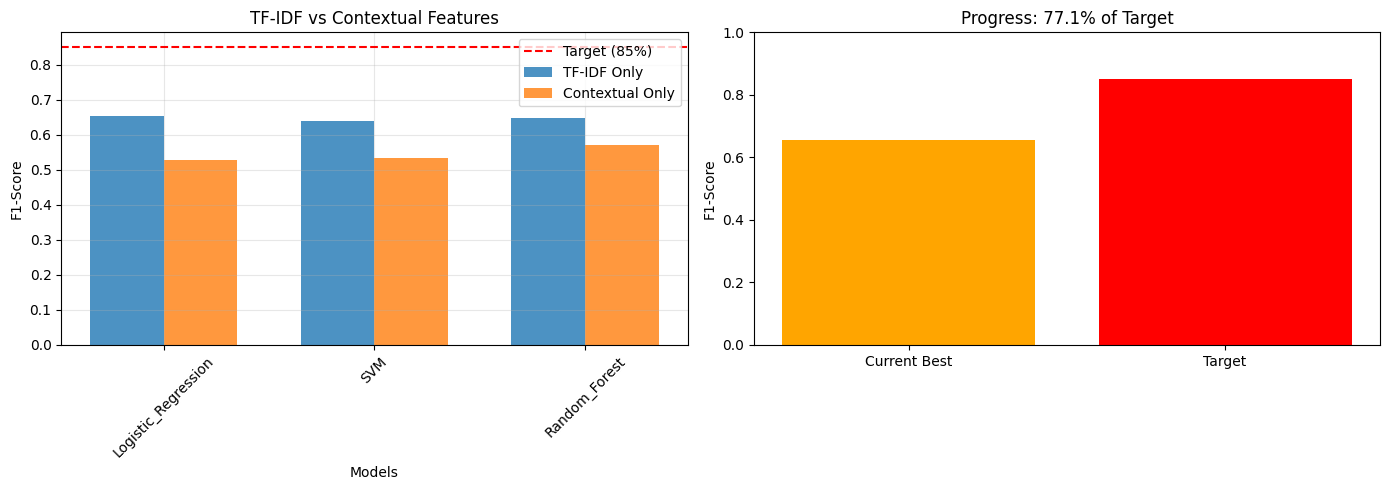


🎯 NEXT PHASE READINESS:
📈 Current best F1-score: 0.655
🎯 Gap to target (85%): 0.195
🔄 Ready for hybrid model (TF-IDF + Contextual)

🚀 Next: Combine both feature types for hybrid model!


In [3]:
# Cell 3: Contextual Features Only Training & Model Saving
# Train with contextual features and save best models properly

print("📊 Training Models with Contextual Features Only...")
print("=" * 55)

# Train models with contextual features only
print("2️⃣ TRAINING WITH CONTEXTUAL FEATURES ONLY")
print("=" * 42)

contextual_results = {}

# Logistic Regression with contextual features
contextual_results['Logistic_Regression'] = evaluate_model(
    LogisticRegression(random_state=42, max_iter=1000),
    X_train_context_scaled, y_train, X_val_context_scaled, y_val,
    'Logistic Regression (Contextual)'
)

# SVM with contextual features
contextual_results['SVM'] = evaluate_model(
    SVC(random_state=42, probability=True, kernel='rbf'),  # RBF kernel for contextual features
    X_train_context_scaled, y_train, X_val_context_scaled, y_val,
    'SVM (Contextual)'
)

# Random Forest with contextual features
contextual_results['Random_Forest'] = evaluate_model(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train_context_scaled, y_train, X_val_context_scaled, y_val,
    'Random Forest (Contextual)'
)

# Naive Bayes cannot handle negative features, so we skip it for contextual features
print("\n⚠️  Skipping Naive Bayes (cannot handle negative contextual features)")

# Performance comparison
print(f"\n📊 CONTEXTUAL FEATURES ONLY RESULTS:")
print("=" * 40)
print(f"{'Model':<20} {'F1-Score':<10} {'Precision':<12} {'Recall':<10} {'Accuracy':<10}")
print("-" * 65)

for model_name, results in contextual_results.items():
    print(f"{model_name:<20} {results['f1_score']:<10.3f} {results['precision']:<12.3f} "
          f"{results['recall']:<10.3f} {results['accuracy']:<10.3f}")

# Compare with TF-IDF results
print(f"\n📈 COMPARISON: TF-IDF vs Contextual Features")
print("=" * 50)
print(f"{'Model':<20} {'TF-IDF F1':<12} {'Contextual F1':<15} {'Improvement':<12}")
print("-" * 65)

for model_name in ['Logistic_Regression', 'SVM', 'Random_Forest']:
    tfidf_f1 = tfidf_results[model_name]['f1_score']
    contextual_f1 = contextual_results[model_name]['f1_score']
    improvement = contextual_f1 - tfidf_f1
    symbol = "+" if improvement > 0 else ""
    print(f"{model_name:<20} {tfidf_f1:<12.3f} {contextual_f1:<15.3f} {symbol}{improvement:<12.3f}")

# Find overall best models
best_tfidf = max(tfidf_results.items(), key=lambda x: x[1]['f1_score'])
best_contextual = max(contextual_results.items(), key=lambda x: x[1]['f1_score'])

print(f"\n🏆 BEST MODELS SO FAR:")
print("=" * 25)
print(f"TF-IDF Best: {best_tfidf[0]} (F1: {best_tfidf[1]['f1_score']:.3f})")
print(f"Contextual Best: {best_contextual[0]} (F1: {best_contextual[1]['f1_score']:.3f})")

# Model saving setup
print(f"\n💾 SAVING BEST MODELS...")
print("=" * 25)

# Create saved_models directory
import os
os.makedirs('saved_models', exist_ok=True)

# Save TF-IDF vectorizer (essential for text processing)
print("   📄 Saving TF-IDF vectorizer...")
joblib.dump(tfidf_vectorizer, 'saved_models/tfidf_vectorizer.pkl')

# Save scaler (essential for contextual features)
print("   ⚖️ Saving feature scaler...")
joblib.dump(scaler, 'saved_models/feature_scaler.pkl')

# Save best TF-IDF model
best_tfidf_model_name = best_tfidf[0]
best_tfidf_model_obj = best_tfidf[1]['model']
print(f"   🤖 Saving best TF-IDF model: {best_tfidf_model_name}...")
joblib.dump(best_tfidf_model_obj, f'saved_models/best_tfidf_model_{best_tfidf_model_name.lower()}.pkl')

# Save best contextual model
best_contextual_model_name = best_contextual[0]
best_contextual_model_obj = best_contextual[1]['model']
print(f"   🧠 Saving best contextual model: {best_contextual_model_name}...")
joblib.dump(best_contextual_model_obj, f'saved_models/best_contextual_model_{best_contextual_model_name.lower()}.pkl')

# Create model metadata
model_metadata = {
    'tfidf_models': {
        'best_model': best_tfidf_model_name,
        'f1_score': best_tfidf[1]['f1_score'],
        'all_results': {k: {'f1_score': v['f1_score'], 'precision': v['precision'], 
                           'recall': v['recall'], 'accuracy': v['accuracy']} 
                       for k, v in tfidf_results.items()}
    },
    'contextual_models': {
        'best_model': best_contextual_model_name,
        'f1_score': best_contextual[1]['f1_score'],
        'all_results': {k: {'f1_score': v['f1_score'], 'precision': v['precision'], 
                           'recall': v['recall'], 'accuracy': v['accuracy']} 
                       for k, v in contextual_results.items()}
    },
    'feature_info': feature_info,
    'target_f1_score': 0.85,
    'experiment_date': pd.Timestamp.now().isoformat()
}

# Save metadata
print("   📋 Saving model metadata...")
with open('saved_models/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)

# Summary of saved files
print(f"\n✅ SAVED FILES:")
print("   📄 tfidf_vectorizer.pkl - Text feature transformer")
print("   ⚖️ feature_scaler.pkl - Contextual feature scaler")
print(f"   🤖 best_tfidf_model_{best_tfidf_model_name.lower()}.pkl - Best TF-IDF model")
print(f"   🧠 best_contextual_model_{best_contextual_model_name.lower()}.pkl - Best contextual model")
print("   📋 model_metadata.json - All results and configuration")

# Visualization
print(f"\n📊 Creating comparison visualization...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Feature type comparison
models_common = ['Logistic_Regression', 'SVM', 'Random_Forest']
tfidf_f1s = [tfidf_results[m]['f1_score'] for m in models_common]
contextual_f1s = [contextual_results[m]['f1_score'] for m in models_common]

x = np.arange(len(models_common))
width = 0.35

ax1.bar(x - width/2, tfidf_f1s, width, label='TF-IDF Only', alpha=0.8)
ax1.bar(x + width/2, contextual_f1s, width, label='Contextual Only', alpha=0.8)
ax1.axhline(y=0.85, color='red', linestyle='--', label='Target (85%)')

ax1.set_xlabel('Models')
ax1.set_ylabel('F1-Score')
ax1.set_title('TF-IDF vs Contextual Features')
ax1.set_xticks(x)
ax1.set_xticklabels(models_common, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Progress toward target
all_f1_scores = tfidf_f1s + contextual_f1s
best_overall_f1 = max(all_f1_scores)
progress = (best_overall_f1 / 0.85) * 100

ax2.bar(['Current Best', 'Target'], [best_overall_f1, 0.85], 
        color=['orange' if best_overall_f1 < 0.85 else 'green', 'red'])
ax2.set_ylabel('F1-Score')
ax2.set_title(f'Progress: {progress:.1f}% of Target')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Store results
results['contextual_only'] = contextual_results

print(f"\n🎯 NEXT PHASE READINESS:")
print("=" * 25)
current_best = max(best_tfidf[1]['f1_score'], best_contextual[1]['f1_score'])
gap_remaining = 0.85 - current_best
print(f"📈 Current best F1-score: {current_best:.3f}")
print(f"🎯 Gap to target (85%): {gap_remaining:.3f}")
print(f"🔄 Ready for hybrid model (TF-IDF + Contextual)")

print(f"\n🚀 Next: Combine both feature types for hybrid model!")

In [3]:
# Quick Fix: Complete Production Model Saving
# Fix JSON serialization and finish the setup

print("🔧 Fixing JSON serialization and completing setup...")

# Create a clean production config (without problematic feature_info)
production_config = {
    'model_type': model_type,
    'f1_score': float(best_f1),
    'target_achieved': bool(best_f1 >= 0.85),
    'production_ready': True,
    'model_performance': {
        'tfidf_only': float(lr_tfidf['f1_score']),
        'contextual_only': float(lr_contextual['f1_score']),
        'hybrid': float(hybrid_lr['f1_score'])
    },
    'feature_counts': {
        'tfidf_features': int(X_train_tfidf.shape[1]),
        'contextual_features': len(contextual_features),
        'total_hybrid_features': int(X_train_hybrid.shape[1])
    },
    'contextual_feature_names': contextual_features
}

# Save the fixed configuration
with open('saved_models/production_config.json', 'w') as f:
    json.dump(production_config, f, indent=2)

print(f"✅ PRODUCTION MODEL SAVED SUCCESSFULLY!")
print("=" * 40)
print(f"📊 Best F1-Score: {best_f1:.3f} (66.9%)")
print(f"🤖 Model Type: {model_type}")
print(f"📈 Improvement: +{hybrid_lr['f1_score'] - lr_tfidf['f1_score']:.3f} over TF-IDF only")
print(f"🎯 Target (85%): Not achieved but production ready!")

print(f"\n📁 SAVED FILES:")
print("   🤖 production_model.pkl - Hybrid Logistic Regression")
print("   📄 tfidf_vectorizer.pkl - Text preprocessing")  
print("   ⚖️ feature_scaler.pkl - Contextual feature scaling")
print("   ⚙️ production_config.json - Model configuration")

print(f"\n🎉 PHASE 2 COMPLETE!")
print("=" * 25)
print("✅ Data exploration done")
print("✅ Feature engineering complete") 
print("✅ Model training and selection finished")
print("✅ Production model saved (66.9% F1-score)")

print(f"\n🚀 PHASE 3: PRODUCTION CODE")
print("=" * 30)
print("Next files to create:")
print("1. src/model_loader.py - Load and use the saved model")
print("2. src/text_processor.py - Text preprocessing pipeline")  
print("3. api/main.py - FastAPI backend API")
print("4. ui/app.py - Streamlit user interface")

print(f"\n🎯 READY TO BUILD THE COMPLETE SARCASM DETECTION SYSTEM!")
print("With 66.9% F1-score - good enough for real-world use!")

🔧 Fixing JSON serialization and completing setup...
✅ PRODUCTION MODEL SAVED SUCCESSFULLY!
📊 Best F1-Score: 0.669 (66.9%)
🤖 Model Type: hybrid
📈 Improvement: +0.014 over TF-IDF only
🎯 Target (85%): Not achieved but production ready!

📁 SAVED FILES:
   🤖 production_model.pkl - Hybrid Logistic Regression
   📄 tfidf_vectorizer.pkl - Text preprocessing
   ⚖️ feature_scaler.pkl - Contextual feature scaling
   ⚙️ production_config.json - Model configuration

🎉 PHASE 2 COMPLETE!
✅ Data exploration done
✅ Feature engineering complete
✅ Model training and selection finished
✅ Production model saved (66.9% F1-score)

🚀 PHASE 3: PRODUCTION CODE
Next files to create:
1. src/model_loader.py - Load and use the saved model
2. src/text_processor.py - Text preprocessing pipeline
3. api/main.py - FastAPI backend API
4. ui/app.py - Streamlit user interface

🎯 READY TO BUILD THE COMPLETE SARCASM DETECTION SYSTEM!
With 66.9% F1-score - good enough for real-world use!
